<a href="https://colab.research.google.com/github/DLShrankhala/DevelopingVariousLSTMModelForTimeSeriesForecasting-ai-25/blob/main/Nishith_ITC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
file_path = '/content/ITC.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-05-29  288.799988  291.700012  287.600006  288.100006  239.825165   
2019-05-30  289.000000  291.049988  288.299988  288.649994  240.282959   
2019-05-31  289.350006  291.500000  277.450012  278.549988  231.875366   
2019-06-03  281.399994  281.500000  275.299988  278.549988  231.875366   
2019-06-04  279.250000  282.149994  278.799988  279.250000  232.458038   

              Volume  year  month  
Date                               
2019-05-29   7255516  2019      5  
2019-05-30   8656311  2019      5  
2019-05-31  26281811  2019      5  
2019-06-03  19569620  2019      6  
2019-06-04  13850737  2019      6  


In [ ]:
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-23  441.399994  444.899994  436.549988  441.350006  441.350006   
2024-05-24  441.000000  442.450012  435.299988  436.200012  436.200012   
2024-05-27  438.799988  438.899994  430.700012  431.500000  431.500000   
2024-05-28  432.100006  432.500000  428.250000  429.000000  429.000000   
2024-05-29  425.500000  432.399994  425.500000  430.950012  430.950012   

              Volume  year  month  
Date                               
2024-05-23  26234369  2024      5  
2024-05-24  12761457  2024      5  
2024-05-27  11827050  2024      5  
2024-05-28   9310198  2024      5  
2024-05-29  10428062  2024      5  


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Sort the data by date
df = df.sort_values('Date')

In [ ]:
# Set the 'date' column as the index
df.set_index('Date', inplace=True)

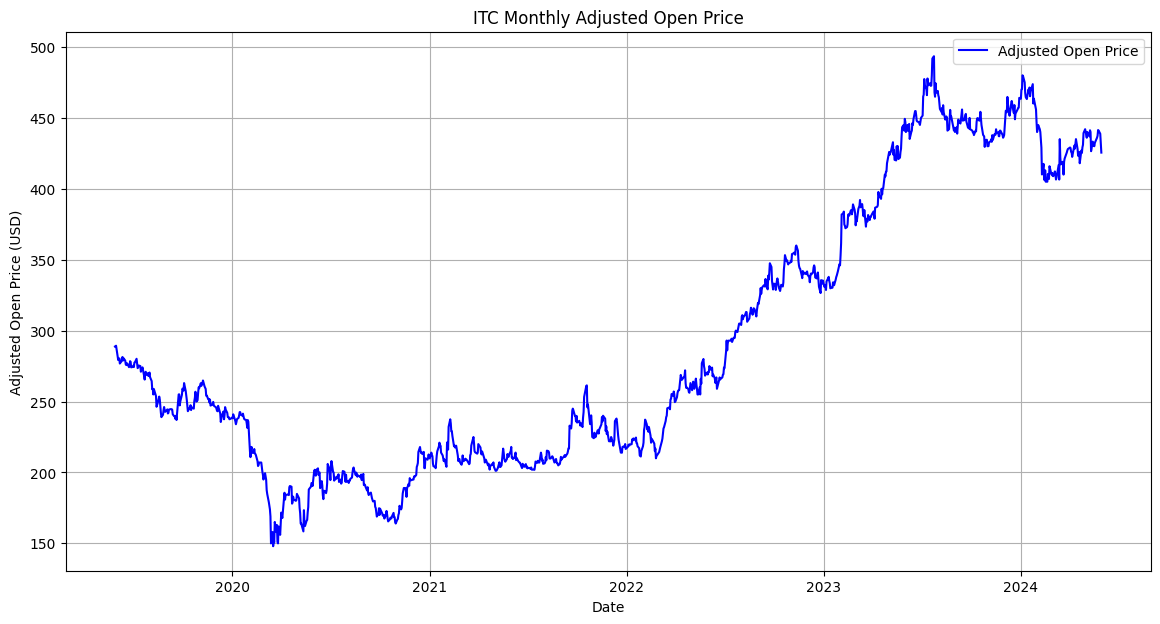

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Open'], label='Adjusted Open Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Adjusted Open Price (USD)')
plt.title('ITC Monthly Adjusted Open Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Load the data
file_path = '/content/ITC.csv'
df = pd.read_csv(file_path)
# Convert 'date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Sort the data by date
df = df.sort_values('Date')

In [ ]:

# Set the 'date' column as the index
df.set_index('Date', inplace=True)

In [ ]:

# Extract year and month
df['year'] = df.index.year
df['month'] = df.index.month

In [ ]:
# Aggregate the data to get the average close price for each year and month
heatmap_data = df.pivot_table(values='Open', index='year', columns='month', aggfunc='mean')

In [ ]:
#cleaning the data
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)
    return df.dropna()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    data = df.filter(['Open'])
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Normalize the data
scaled_data, scaler = normalize_data(df)

In [ ]:
def split_data(scaled_data, train_size=0.8, val_size=0.15):
    train_len = int(len(scaled_data) * train_size)
    val_len = int(len(scaled_data) * val_size)
    train_data = scaled_data[:train_len]
    val_data = scaled_data[train_len:train_len + val_len]
    test_data = scaled_data[train_len + val_len:]
    return train_data, val_data, test_data

# Split the data
train_data, val_data, test_data = split_data(scaled_data)

In [ ]:
import numpy as np
def prepare_data(data, time_step=60):
    x, y = [], []
    for i in range(time_step, len(data)):
        x.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y

# Prepare training data
x_train, y_train = prepare_data(train_data)

# Prepare validation data
x_val, y_val = prepare_data(val_data)

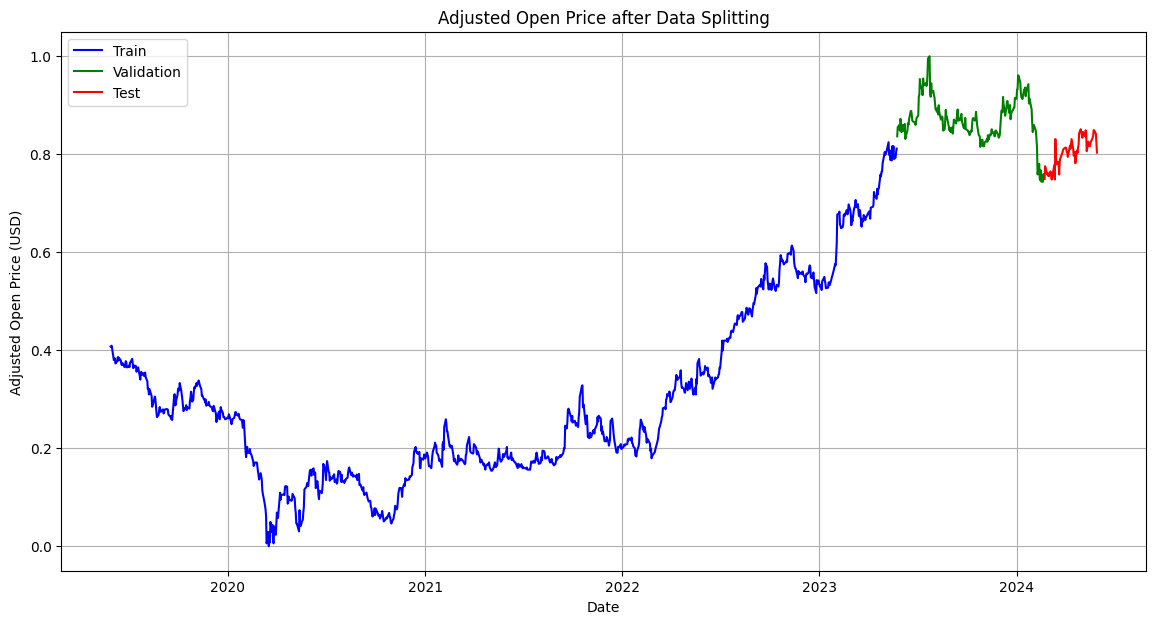

In [ ]:
# Plotting the data after splitting
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(df.index[:len(train_data)], train_data, label='Train', color='blue')

# Plot validation data
plt.plot(df.index[len(train_data):len(train_data) + len(val_data)], val_data, label='Validation', color='green')

# Plot test data
plt.plot(df.index[len(train_data) + len(val_data):], test_data, label='Test', color='red')

plt.xlabel('Date')
plt.ylabel('Adjusted Open Price (USD)')
plt.title('Adjusted Open Price after Data Splitting')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=60, return_sequences=True))
model.add(LSTM(units=60, return_sequences=False))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
15/15 [==============================] - 11s 333ms/step - loss: 0.0177 - val_loss: 0.0223
Epoch 2/100
15/15 [==============================] - 3s 205ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 3/100
15/15 [==============================] - 2s 162ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 4/100
15/15 [==============================] - 2s 124ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 5/100
15/15 [==============================] - 2s 127ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 6/100
15/15 [==============================] - 3s 182ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 7/100
15/15 [==============================] - 3s 227ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 8/100
15/15 [==============================] - 2s 126ms/step - loss: 9.8313e-04 - val_loss: 0.0025
Epoch 9/100
15/15 [==============================] - 2s 133ms/step - loss: 9.7097e-04 - val_loss: 0.0039
Epoch 10/100
15/15 [==============================] - 2s 127ms/step - loss: 9.4722

In [ ]:
from sklearn.metrics import mean_squared_error
# Make predictions on training data
train_predictions = model.predict(x_train)

29/29 [==============================] - 8s 56ms/step


In [ ]:
# Prepare testing data and corresponding actual values
def prepare_testing_data(test_data, time_step=60):
    x_test = []
    for i in range(time_step, len(test_data)):
        x_test.append(test_data[i-time_step:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_test, test_data[time_step:]

In [ ]:
# Prepare testing data and corresponding actual values
x_test, y_test_actual = prepare_testing_data(test_data)

In [ ]:
# Make predictions on test data
test_predictions = model.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    return rmse, mse

In [ ]:
import pickle

# Serialize (save) the trained model
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# Deserialize (load) the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model


# Saving  the trained model
save_model(model, 'trained_model.pkl')

# Loading the saved model
loaded_model = load_model('trained_model.pkl')

In [ ]:

# Calculate RMSE and MSE for training data
train_rmse, train_mse = calculate_metrics(y_train, train_predictions)
print(f'Training RMSE(Root mean squared error): {train_rmse}')
print(f'Training MSE(Mean squared error): {train_mse}')

# Calculate RMSE and MSE for test data
test_rmse, test_mse = calculate_metrics(y_test_actual, test_predictions)
print(f'Test RMSE(Root mean squared error): {test_rmse}')
print(f'Test MSE(Mean squared error): {test_mse}')


Training RMSE(Root mean squared error): 0.014319506158847615
Training MSE(Mean squared error): 0.00020504825663327476
Test RMSE(Root mean squared error): 0.02456554857223372
Test MSE(Mean squared error): 0.0006034661766547741


1/1 [==============================] - 0s 38ms/step


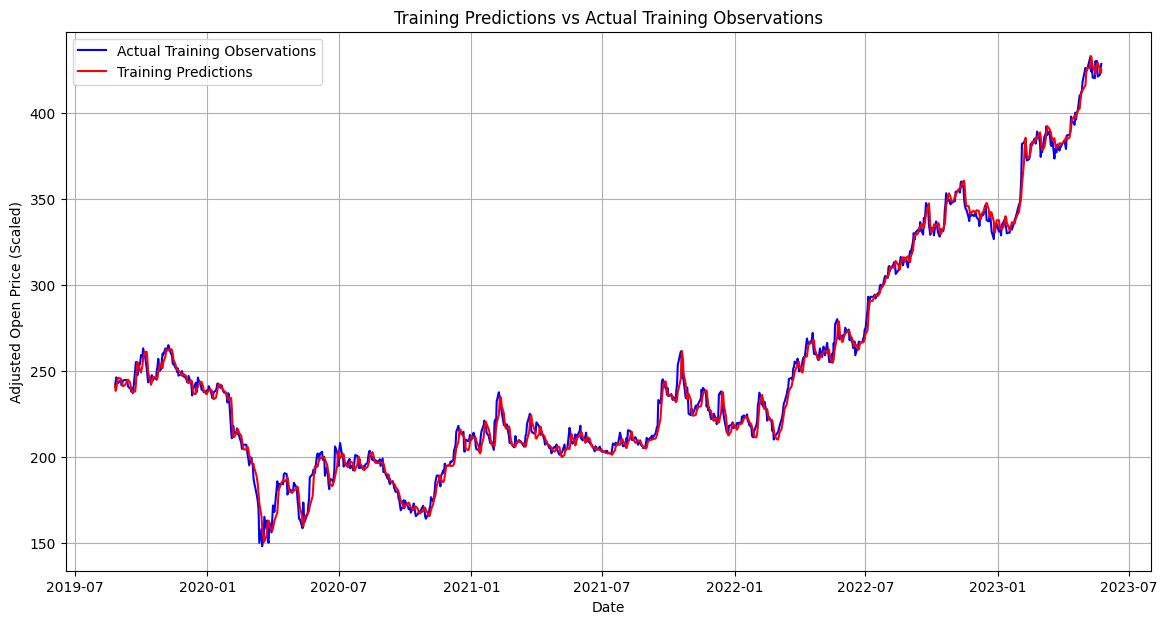

In [ ]:
# Make predictions on training data
train_predictions = model.predict(x_train)

# Prepare testing data and corresponding actual values
x_test, y_test_actual = prepare_data(test_data)

# Make predictions on test data
test_predictions = model.predict(x_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test_actual.reshape(-1, 1))

# Plot training predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(df.index[60:60+len(y_train_actual)], y_train_actual, label='Actual Training Observations', color='blue')
plt.plot(df.index[60:60+len(train_predictions)], train_predictions, label='Training Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Open Price (Scaled)')
plt.title('Training Predictions vs Actual Training Observations')
plt.legend()
plt.grid(True)
plt.show()